Importing the required libraries and reading the data

In [1]:
#data analysis
import numpy as np
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine Learning Model
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_dataset = pd.read_csv('./train.csv')
test_dataset = pd.read_csv('./test.csv')

In [3]:
print(train_dataset.columns)
print(test_dataset.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(train_dataset.info())
print(test_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [5]:
train_dataset.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [6]:
print(train_dataset.describe())
print('-'*60)
print(test_dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
------------------------------------------------------------
       PassengerId  

In [7]:
print(train_dataset.describe(include=object))
print('-'*70)
print(test_dataset.describe(include=object))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644
----------------------------------------------------------------------
                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. James  male  PC 17608  B57 B59 B63 B66        S
freq                   1   266         5                3      270


Keeping PassengerId in our training set is of no use. Also, Ticket feature is irrelevant as the ticket number is a system generated number which won't impact survival. Cabin feature has many empty entries in the training as well as test dataset so I will drop it

In [8]:
train_dataset = train_dataset.drop(['PassengerId','Cabin', 'Ticket'], axis=1)
test_dataset = test_dataset.drop(['Cabin', 'Ticket'], axis=1)
print(test_dataset.shape, train_dataset.shape)

(418, 9) (891, 9)


Now we shall view the variation of survival with different features

In [9]:
print(train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived'))
print('-'*30)
print(train_dataset[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived'))
print('-'*30)
print(train_dataset[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived'))

   Pclass  Survived
2       3  0.242363
1       2  0.472826
0       1  0.629630
------------------------------
      Sex  Survived
1    male  0.188908
0  female  0.742038
------------------------------
         Fare  Survived
56     8.7125       0.0
160   32.3208       0.0
76    11.5000       0.0
163   33.5000       0.0
164   34.0208       0.0
..        ...       ...
161   32.5000       1.0
77    12.0000       1.0
79    12.2875       1.0
44     8.1125       1.0
247  512.3292       1.0

[248 rows x 2 columns]


There is a strong correlation between Sex and Survival Rate as well as Pclass and Survival. There is no direct correlation between Fare and Survival.

In [10]:
print(train_dataset[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values('Survived'))
print('-'*30)
print(train_dataset[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values('Parch'))

   SibSp  Survived
5      5  0.000000
6      8  0.000000
4      4  0.166667
3      3  0.250000
0      0  0.345395
2      2  0.464286
1      1  0.535885
------------------------------
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


Parch and SibSp do not have a direct correlation with Survival. However, intuitively, we can believe that families group together and try to protect each other. So we can try to create a combined feature with the above 2 features that results in a feature with direct correlation

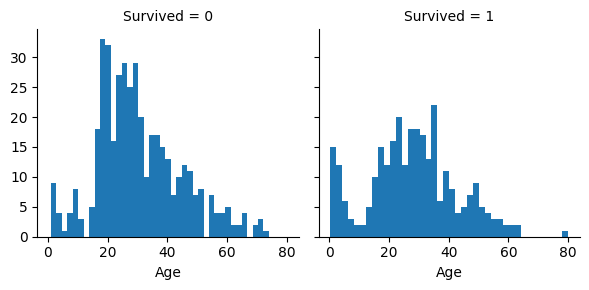

In [11]:
h = sns.FacetGrid(train_dataset, col='Survived')
h.map(plt.hist, 'Age', bins=40)

This shows that infants <6 had a good survival rate. Passengers with age ~80 also survived. Most passengers with the age 14-30 died. Thus age is a valuable feature and shouldn't be dropped. We should fill up the null values.

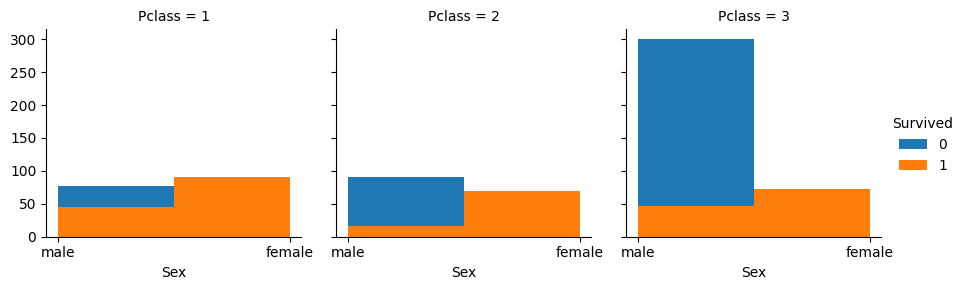

In [12]:
h = sns.FacetGrid(train_dataset, col='Pclass', hue='Survived')
h.map(plt.hist, 'Sex', bins=2)
h.add_legend()

Therefore, most passengers were of Pclass = 3. Men had a small survival rate as compared to women across all classes.

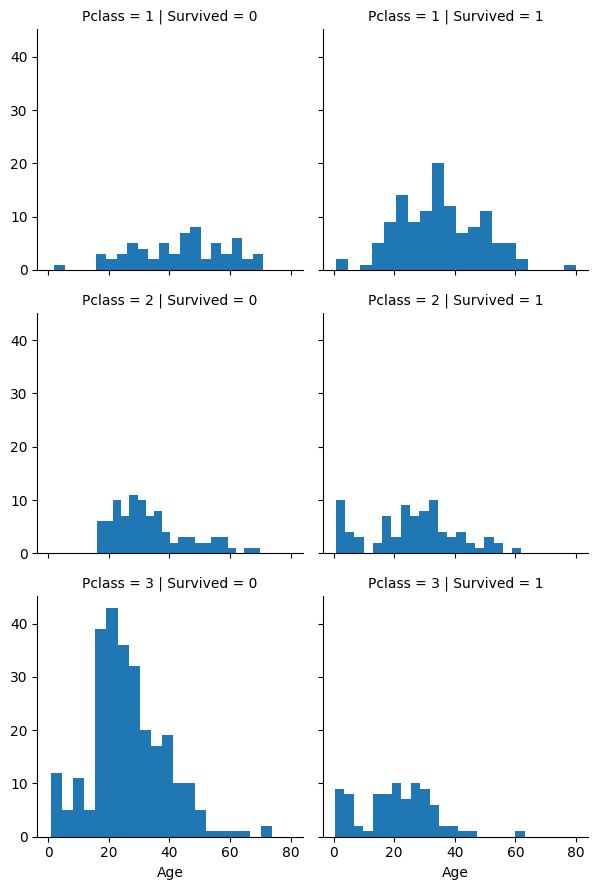

In [13]:
grid = sns.FacetGrid(train_dataset, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

/home/siddhant/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/siddhant/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


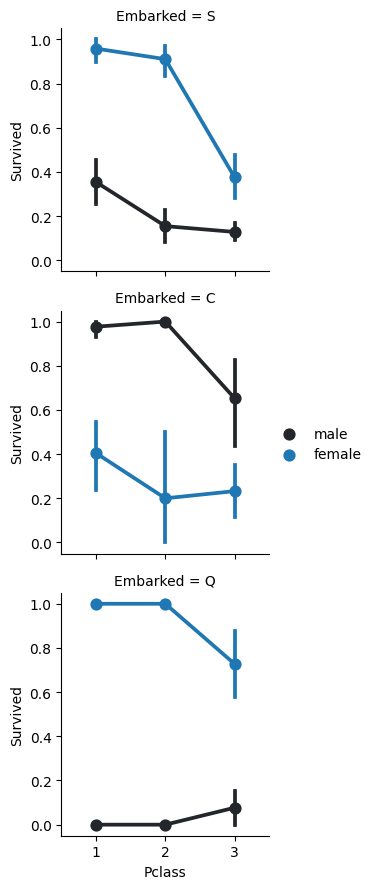

In [14]:
grid = sns.FacetGrid(train_dataset, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

Males had lower survival rate except for Embarked = C. 

/home/siddhant/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/siddhant/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


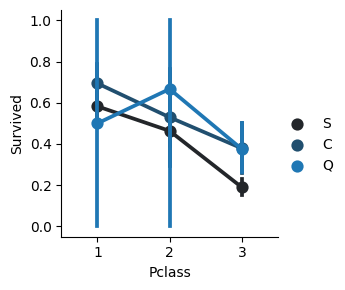

In [15]:
grid = sns.FacetGrid(train_dataset)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Embarked')
grid.add_legend()

Thus a combination of Embarkment and Pclass does seem to affect the Survival. We will complete Embarked feature.

/home/siddhant/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


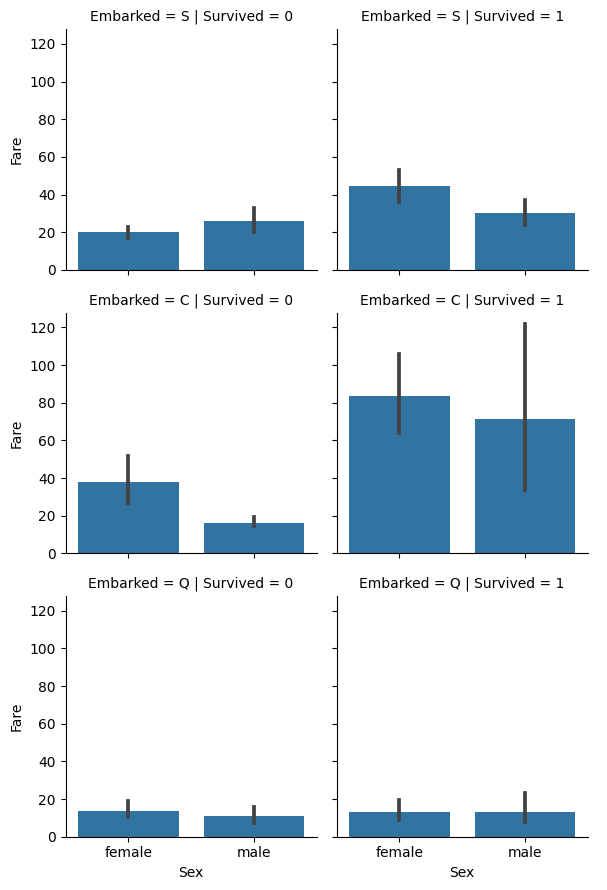

In [16]:
g = sns.FacetGrid(train_dataset, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare')
g.add_legend()

Clearly, there is a relation of the Embarked feature with Survival (S < C < Q). The fare also helps us determine the Survival so we can consider grouping of the Fare feature.

Now, we will create a new feature called 'FamilySize' from SibSp and Parch.

In [17]:
print(train_dataset.shape, test_dataset.shape)
combined_data = [train_dataset, test_dataset]

#Now we can perform data operations on combined_data

(891, 9) (418, 9)


Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
------------------------------
Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


/home/siddhant/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


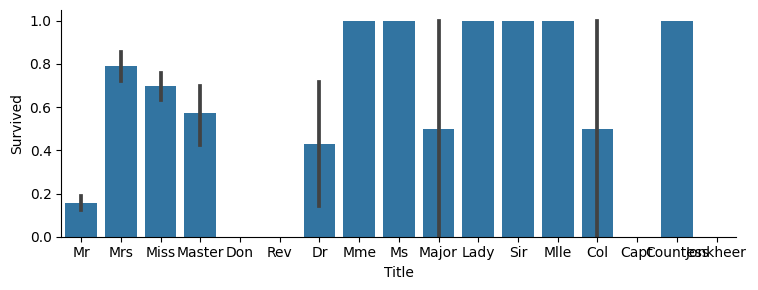

In [18]:
for dataset in combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print(pd.crosstab(train_dataset['Title'], train_dataset['Sex']))
print('-'*30)
print(pd.crosstab(test_dataset['Title'], test_dataset['Sex']))

g = sns.FacetGrid(train_dataset, aspect=2.5)
g.map(sns.barplot, 'Title', 'Survived')
g.add_legend()

/home/siddhant/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


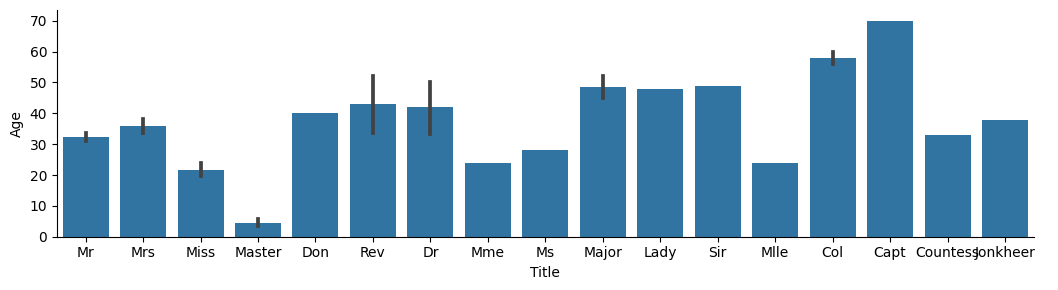

In [19]:
g = sns.FacetGrid(train_dataset, aspect=3.5)
g.map(sns.barplot, 'Title', 'Age')
g.add_legend()

In [20]:
for dataset in combined_data:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_dataset[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values('Survived')

,Title,Survived
3,Mr,0.156673
5,Rare,0.312500
0,Dr,0.428571
1,Master,0.575000
2,Miss,0.702703
4,Mrs,0.793651


In [21]:
title_mapping = {'Mr' : 1, 'Rare' : 2, 'Dr' : 3, 'Master' : 4, 'Miss' : 5, 'Mrs' : 6}

for dataset in combined_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,6
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [22]:
train_dataset = train_dataset.drop(['Name'], axis=1)
test_dataset = test_dataset.drop(['Name'], axis=1)

combined_data = [train_dataset, test_dataset]

print(train_dataset.shape, test_dataset.shape)

(891, 9) (418, 9)


In [23]:
for dataset in combined_data:
    dataset['Sex'] = dataset['Sex'].map({'female' : 1, 'male' : 0})

train_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,6
2,1,3,1,26.0,0,0,7.9250,S,5
3,1,1,1,35.0,1,0,53.1000,S,6
4,0,3,0,35.0,0,0,8.0500,S,1


Completing a numerically continuous feature:
We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on.

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

In [24]:
train_dataset.columns, test_dataset.columns

(Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Title'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Title'],
       dtype='object'))

We can complete the age feature using the mean values determined by other features. SibSp and Parch would've made sense if we knew whether all passengers were travelling with their entire families however that is not the case. So, we can try to complete the feature with Pclass and Sex values.

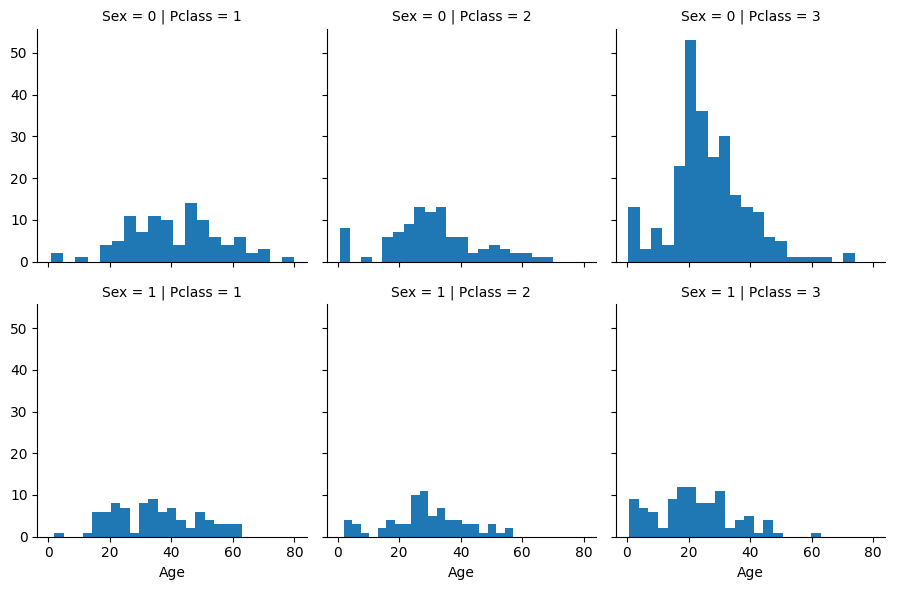

In [25]:
g = sns.FacetGrid(train_dataset, row='Sex', col='Pclass')
g.map(plt.hist, 'Age', bins=20)
g.add_legend()

In [26]:
guess_age = np.zeros((2,3))
guess_age

array([[0., 0., 0.],
       [0., 0., 0.]])

In [31]:
train_dataset['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    22
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [27]:
for dataset in combined_data:
    for i in range (2):
        for j in range (3):
            guess_data = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            print(guess_data.mean(), guess_data.std())

            guess_age[i, j] = guess_data.median()


    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_age[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

    # dataset['Age'] = dataset['Age'].astype(int)

print(train_dataset.describe())

41.28138613861386 15.139570471430355
30.74070707070707 14.793893752224001
26.507588932806325 12.159513851309782
34.61176470588235 13.612051835857546
28.722972972972972 12.872701787671772
21.75 12.729963872612515
40.52 13.507352495162458
30.940677966101696 12.610232826804996
24.525104166666665 10.24025071596771
41.333333333333336 14.541698418953732
24.376551724137933 12.697826663269717
23.073400000000003 11.128369264622554
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.072952    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.326339    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   21.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   26.000000    0.000000    0.000000   
75%    

Now we will try and create Age Groups that can be indicative accurately about survival.

In [28]:
train_dataset['AgeGroup'] = pd.cut(train_dataset['Age'], 10)

train_dataset[['AgeGroup', 'Survived']].groupby('AgeGroup', as_index=False).mean().sort_values('Survived', ascending=False)

,AgeGroup,Survived
0,"(-0.08, 8.0]",0.666667
9,"(72.0, 80.0]",0.500000
6,"(48.0, 56.0]",0.466667
4,"(32.0, 40.0]",0.439189
1,"(8.0, 16.0]",0.413043
2,"(16.0, 24.0]",0.400000
7,"(56.0, 64.0]",0.375000
5,"(40.0, 48.0]",0.352941
3,"(24.0, 32.0]",0.287273
8,"(64.0, 72.0]",0.000000


In [29]:
for dataset in combined_data:
    for i in range (10):
        dataset.loc[ (dataset['Age'] > 8 * i) & (dataset['Age'] <= 8 * (i + 1) ), 'Age'] = i + 1   

train_dataset = train_dataset.drop('AgeGroup', axis=1)
print(train_dataset.head())

combined_data = [train_dataset, test_dataset]

   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0    3      1      0   7.2500        S      1
1         1       1    1    5      1      0  71.2833        C      6
2         1       3    1    4      0      0   7.9250        S      5
3         1       1    1    5      1      0  53.1000        S      6
4         0       3    0    5      0      0   8.0500        S      1


In [30]:
for dataset in combined_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_dataset[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean().sort_values('Survived')

,FamilySize,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [31]:
combined_data = [train_dataset, test_dataset]

for dataset in combined_data:
    dataset['IsAlone'] = 0
    dataset.loc[ (dataset.FamilySize == 1), 'IsAlone'] = 1

train_dataset[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

train_dataset = train_dataset.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)

train_dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,3,7.2500,S,1,0
1,1,1,1,5,71.2833,C,6,0
2,1,3,1,4,7.9250,S,5,1
3,1,1,1,5,53.1000,S,6,0
4,0,3,0,5,8.0500,S,1,1


Embarked feature has 2 empty values. We can fill it with the most common port.

In [32]:
freq_port = train_dataset.Embarked.dropna().mode()[0]
print(train_dataset.head())
freq_port

combined_data = [train_dataset, test_dataset]

   Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone
0         0       3    0    3   7.2500        S      1        0
1         1       1    1    5  71.2833        C      6        0
2         1       3    1    4   7.9250        S      5        1
3         1       1    1    5  53.1000        S      6        0
4         0       3    0    5   8.0500        S      1        1


In [33]:
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

print(test_dataset.info())
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    float64
 9   FamilySize   418 non-null    int64  
 10  IsAlone      418 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 no

In [34]:
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].map( { 'C' : 0, 'Q' : 1, 'S': 2} )
    dataset['Embarked'] = dataset['Embarked'].astype(int)


print(test_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    float64
 9   FamilySize   418 non-null    int64  
 10  IsAlone      418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.0 KB
None


In [35]:
test_dataset['Fare'].fillna(test_dataset['Fare'].dropna().median(), inplace=True)

In [36]:
train_dataset['FareBand'] = pd.qcut(train_dataset['Fare'], 4)
train_dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
combined_data = [train_dataset, test_dataset]

for dataset in combined_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_dataset = train_dataset.drop(['FareBand'], axis=1)

train_dataset['Fare'] = train_dataset['Fare'].astype(int)

print(train_dataset.dtypes, "\n" ,test_dataset.dtypes)

Survived    int64
Pclass      int64
Sex         int64
Age         int64
Fare        int64
Embarked    int64
Title       int64
IsAlone     int64
dtype: object 
 PassengerId      int64
Pclass           int64
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare             int64
Embarked         int64
Title          float64
FamilySize       int64
IsAlone          int64
dtype: object


In [43]:
test_dataset = test_dataset.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)

test_dataset.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,5,0,1,1.0,1
1,893,3,1,6,0,2,6.0,0
2,894,2,0,8,1,1,1.0,1
3,895,3,0,4,1,2,1.0,1
4,896,3,1,3,1,2,6.0,0


In [44]:
X_train = train_dataset.drop("Survived", axis=1)
Y_train = train_dataset["Survived"]
X_test  = test_dataset.drop("PassengerId", axis=1).copy()

In [46]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)


random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.11

The model has a 89.11% accuracy for training data. Will write the predictions onto csv.

In [60]:
print(Y_pred.shape)

(418,)


In [73]:
passengers = np.arange(start=892, stop= 892+418)

output = pd.DataFrame({'PassengerId' : passengers, 'Survived' : Y_pred})

output.to_csv('submission.csv', index=False)


submission.csv had a 74% accuracy on Kaggle.

Some useful functionality that I learned while implementing this notebook :
1. parameters of DataFrame.describe() function like include, percentile
2. DataFrame.info() function
3. Pandas.get_dummies(), Pandas.crosstab(), Pandas.cut()
4. DataFrame.groupby(), DataFrame.mean(), DataFrame.sort_values()
5. Seaborn Features like pointplot, FacetGrid
6. str.extract() function